In [1]:
%matplotlib inline
import csvs
import matplotlib.pyplot as plt
import pandas
import scipy

In [2]:
import hotroutes as H

# Hot Route Analysis and Visualization

## Exploring the data

In [3]:
d = pandas.read_csv('./rides.csv')
d.head()

,hack_license,pickup_datetime,start_lat,start_lng,dropoff_datetime,end_lat,end_lng,distance_miles,duration_secs,passenger_count
0,58894369838B3783D30EEAA92B364BEB,2013-08-11 10:16:00,40.761032,-73.987091,2013-08-11 10:19:00,40.758083,-73.985519,0.34,180,1
1,6AC79A2B688191545021B8CF96ED385F,2013-08-11 10:00:00,40.773907,-73.873360,2013-08-11 10:15:00,40.648796,-73.782616,12.11,900,1
2,C52F793C850CD7CBCC1875FD79A9414C,2013-08-11 10:04:00,40.761890,-73.986977,2013-08-11 10:15:00,40.818638,-73.951485,5.56,660,1
3,5946C99EE9D4216C0A7395E525F2ED5F,2013-08-11 10:04:00,40.765141,-73.980568,2013-08-11 10:13:00,40.780441,-73.972839,1.44,540,6
4,7C228290C05CE8E37E0FE4C1B806DF88,2013-08-11 10:09:00,40.731152,-73.982193,2013-08-11 10:12:00,40.730576,-73.975960,0.62,180,1


In [4]:
d.describe()

,start_lat,start_lng,end_lat,end_lng,distance_miles,duration_secs,passenger_count
count,2835723.000000,2835723.000000,2835715.000000,2835715.000000,2835723.000000,2835723.000000,2835723.000000
mean,40.749596,-73.975251,40.750119,-73.974743,2.967321,747.643958,1.743615
std,0.027221,0.036386,0.030818,0.035539,3.431376,541.307909,1.414146
min,40.080708,-74.673485,40.055046,-74.772507,0.000000,-10.000000,0.000000
25%,40.735657,-73.992622,40.734795,-73.991821,1.000000,367.000000,1.000000
50%,40.752319,-73.982330,40.752762,-73.981117,1.940000,600.000000,1.000000
75%,40.765671,-73.969101,40.766369,-73.966469,3.250000,960.000000,2.000000
max,41.758438,-71.757393,41.756645,-71.757393,50.000000,7200.000000,6.000000


### Plotting with map overlay

In [5]:
d2 = d[['start_lat', 'start_lng']]
d2.shape

(2835723, 2)

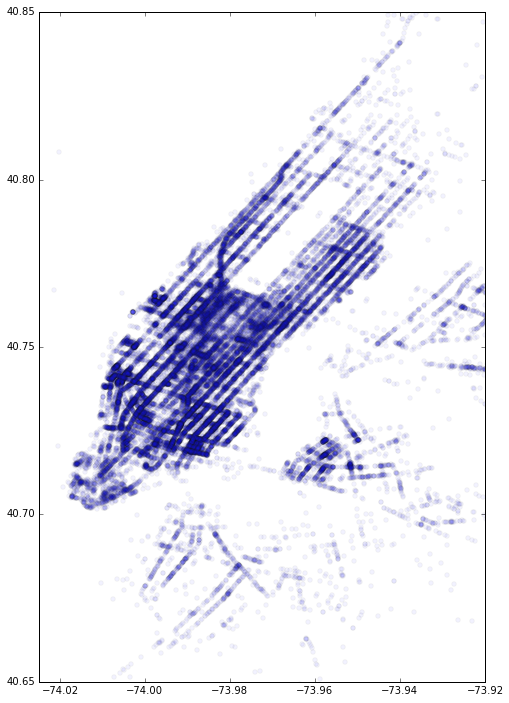

In [6]:
def plot_pickups():
    plt.figure(figsize=(8, 12))
    d2t = d2.tail(50000)
    plt.scatter(x=d2t.start_lng, y=d2t.start_lat, marker='o', alpha=0.05);
    plt.xlim((-74.025, -73.92))
    plt.ylim((40.65, 40.85))

plot_pickups()

Looks like NYC to me... lat and lng check out

#### A couple of taxi rides...

In [7]:
d.iloc[0, [2, 3, 5, 6]]

start_lat    40.76103
start_lng   -73.98709
end_lat      40.75808
end_lng     -73.98552
Name: 0, dtype: object

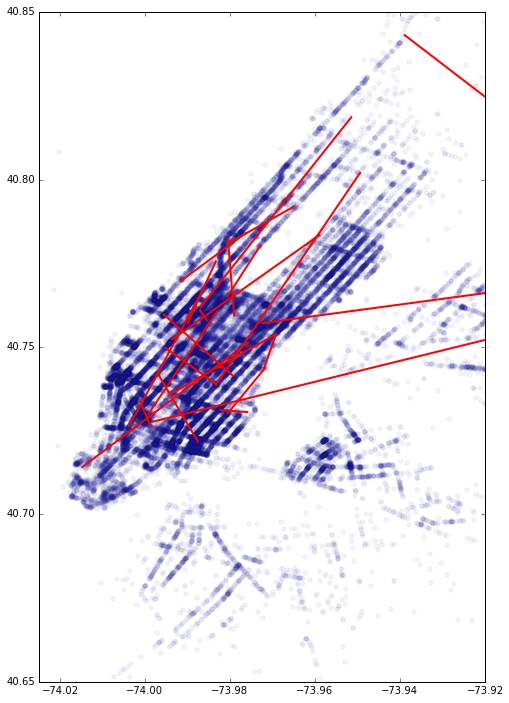

In [8]:
def plot_rides(rides):
    plt.figure(figsize=(8, 12))
    d2t = d2.tail(50000)
    plt.scatter(x=d2t.start_lng, y=d2t.start_lat, marker='o', alpha=0.05);
    plt.xlim((-74.025, -73.92))
    plt.ylim((40.65, 40.85))
    for [x0, y0, x1, y1] in rides:
        plt.plot([x0, x1], [y0, y1], color='r', linewidth=2)

# lines for rides, let's choose 25
rides = []
for i in range(25):
    ride = d.iloc[i, [2, 3, 5, 6]]
    rides.append([
        ride.start_lng, ride.start_lat, ride.end_lng, ride.end_lat
    ])

plot_rides(rides)

## Load / Generate my solution for 5 best hotroutes

### The bad way

If the file './hotroutes.old.csv' exists, load it. If not, too bad, we're not going to generate it

In [9]:
def load_hotroutes():
    with open('./hotroutes.old.csv', 'r') as f:
        return list(csv.DictReader(f))

try:
    hr = load_hotroutes()
except IOError:
    hr = []

#### Plot these hotroutes on the same maps

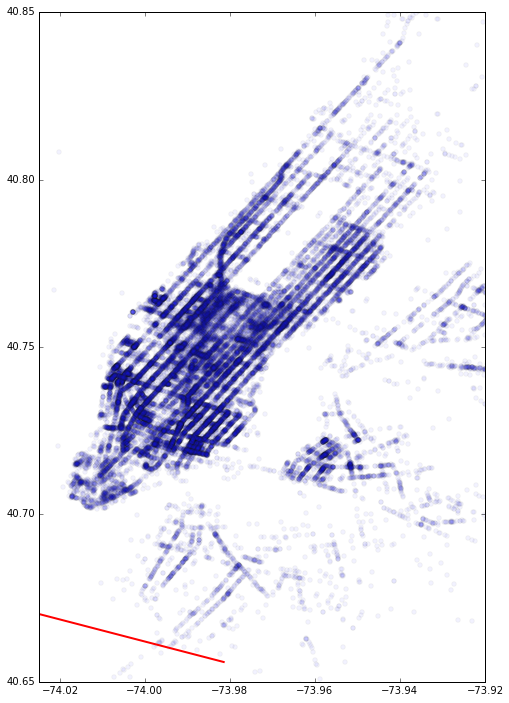

In [10]:
rides = [
    [row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']]
    for row in hr
]

plot_rides(rides)

Well that was pretty awful... What happened?

### The Good Way

We have a huge list of pickup and drop off times. Previously, I was randomly generating routes from the square these values were in; why not just choose these values exactly? Bound to get me pretty close to the desired answer.

If the file './hotroutes.csv' exists, load it. If not, generate it by a call to
```python
H.main(nRoutes=10000, nRides=10000)
```

In [11]:
def load_hotroutes():
    with open('./hotroutes.csv', 'r') as f:
        return list(csv.DictReader(f))

try:
    hr = load_hotroutes()
except IOError:
    H.main(nRoutes=10000, nRides=10000)
    hr = load_hotroutes()

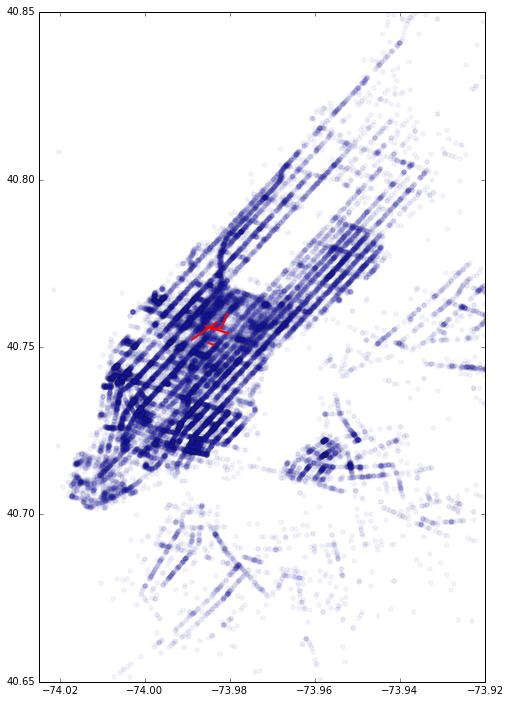

In [12]:
rides = [
    [row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']]
    for row in hr
]

plot_rides(rides)

In [13]:
for row in hr:
    print "({}, {})".format(row['start_lat'], row['start_lng'])
    print "({}, {})".format(row['end_lat'], row['end_lng'])
    print ""

(40.755866999999995, -73.982101)
(40.755305999999997, -73.984519999999989)

(40.756275000000002, -73.985741000000004)
(40.754055000000001, -73.980423000000002)

(40.750591, -73.983886999999996)
(40.751308000000002, -73.985152999999997)

(40.752132000000003, -73.989036999999996)
(40.757449999999999, -73.983108999999999)

(40.755592, -73.982024999999993)
(40.759853, -73.980758999999992)



## Final Thoughts

Basically, I think I went about this all the wrong way. There were at least a few things I forgot to take into account:

+ the time it takes to make a trip affects the number of rides (really, should max the rate of rides)
+ a ride should be weighted by the sum of itself and its backward piece
+ by not having a cutoff in the weighting function, I think I probably arbitrarily just chose the center of population as my center point for everything.

Anyway... it was fun! But I don't think I 'got it'.